# **Quantum Phase Estimation**
#### Quantum Phase Estimation (QPE) is one of the fundamental quantum algorithms used in quantum computing. It estimates the eigenvalue of a unitary operator associated with a given quantum state. Assuming the unit modullus of the eigenvalue, it determines the phase $\theta$ in the eigenvalue equation $U|\psi\rangle = e^{2\pi i \theta}|\psi\rangle$ where $U$ is the unitary operator and $|\psi\rangle$ is one of its eigenstates.

In [1]:
from numpy import pi
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram 

#### To construct a quantum circuit for QPE algorithm, $n$ qubits, called registered qubits, and a qubit with eigenstate $|\psi\rangle$ are needed. There are four steps for QPE algorithm listed bellow:

## **Step 1:** Apply Hadamard gate on all qubits
#### The registered qubits ares prepared in a superposition of all possible states by applying the Hadamard gates on all of them
$$
|\psi_1\rangle = \left(H^{\otimes n}|0\rangle^{\otimes n}\right) |\psi\rangle\nonumber\\
=\frac{1}{\sqrt{2^n}} \big[|0\rangle +|1\rangle\big]^{\otimes n}|\psi\rangle.
$$


## **Step 2:** Apply controlled unitary operators
 
#### $n$ set of controlled unitary operators is applied to the quantum state over various powers of $U$. This encodes information about the phase into the quantum state.
$$
|\psi_2\rangle = \sum_{k = 0}^{2^n-1} U^{k}|\psi_1\rangle
=\frac{1}{\sqrt{2^n}}\sum_{k = 0}^{2^n-1}e^{2\pi i \theta k}|k\rangle \otimes |\psi\rangle
$$
#### where $k$ is an integer encoded in binary.
[comment]: <> (it is a good ref for QPE: https://pennylane.ai/qml/demos/tutorial_qpe/)


## **Step 3:** Apply inverse Quantum Fourier Transform (QFT)
#### The quantum state of $|\psi_2\rangle$ reminds us the quantum Furrier transform (QFT) with $x$ in QFT replaced by $2^n\theta$. Therefore, we can apply the inverse QFT to go back to the computational basis.
$$
|\psi_3\rangle = QFT^{\dagger}|\psi_2\rangle
=|2^n\theta\rangle \otimes |\psi\rangle
$$
#### As this relation shows the encoded phase information is transformed into a measurable form of registered qubits.

## **Step 4:** Measurement:
#### Finally, we measure the registered $n$ qubits. The measurement result gives an estimate of the phase $\theta$. The precision of this estimate improves with the number of qubits used.

#### To apply these steps, first we define two following functions.

In [6]:
def qft_dagger(qc, n):
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-pi/float(2**(j-m)), m, j)
        qc.h(j)
        

In [7]:
def qfe_main(circuit, angle,target_qubits):
    repetitions = 1
    for control_qubit in range(target_qubits):
        for i in range(repetitions):
            circuit.cp(angle, control_qubit, target_qubits)
        repetitions *= 2


## **Find the phase of $S$ gate**
#### Let's check the $S$ gate using QPE. In S gate the angle is $\pi/2$ and by comparing $e^{(i\pi/2)}$ and $e^{(2i\pi \theta)}$ we conclude that: $\theta = \frac{1}{4}$.

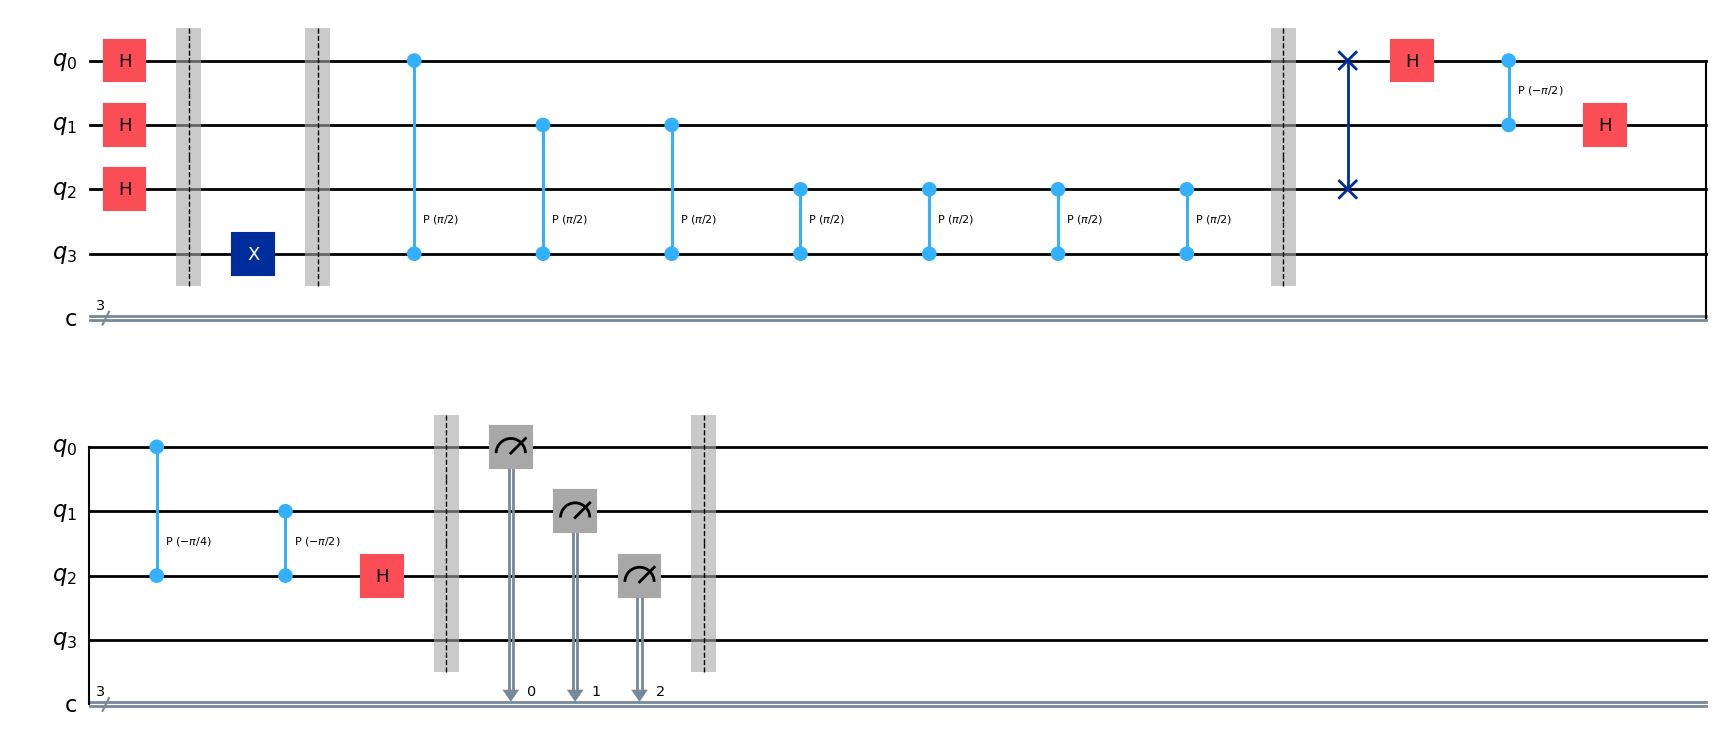

In [8]:
angle = pi/2

qc = QuantumCircuit(4,3) # apply to 3 qubits as 1st regiter and 1 qubit as the 2nd qubit. For the measurment, we need 3 bits.

# Step 1: apply Hadamard gate to the 1st registered qubits
for i in range(3):
    qc.h(i)
qc.barrier()

# Initial state for the 2nd register, i.e. $|\psi>$ , as |2>
qc.x(3)
qc.barrier()

# Step 2: apply controlled unitary operators
qfe_main(qc, angle, 3)
qc.barrier()

# Step 3: apply inverse QFT
qft_dagger(qc, 3)
qc.barrier()

# Step 4: Measurement
for i in range(3):
    qc.measure(i,i)
qc.barrier()

qc.draw('mpl')



 Total counts are: {'010': 1000}


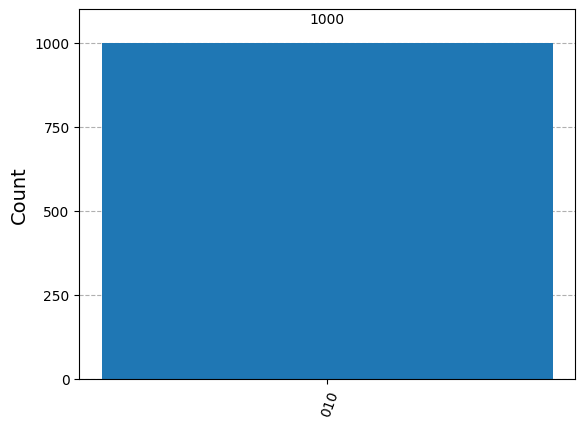

In [9]:
# initiate
estimator = Aer.get_backend('qasm_simulator')

#run
job = estimator.run(qc, shots = 1000)

# result
counts = job.result().get_counts(qc)

print("\n Total counts are:" , counts)

plot_histogram(counts)

### 010 is 2 in binary basis. Therefor $\theta = \frac{2}{2^3} = \frac{1}{4}$ for $n = 3$. 